In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import json
import time

# 定义一个函数来运行 train_mlp_numpy.py 并捕获输出
numpy_mlp = '/Users/claudiacumberbatch/Desktop/CS324_Deep_Learning/Assigment1/12110644_assignment1/Part_2/train_mlp_numpy.py'
pytorch_mlp = 'pytorch_train_mlp.py'
def run_training_script(module, dataset):
    result = subprocess.run([
        'python', module,
        '--dataset', dataset,
    ], capture_output=True, text=True)
    return result.stdout

def run_and_plot(module=numpy_mlp, dataset='moons_dataset.npz'):
    # 运行训练脚本并捕获输出
    print(f'Training {module}')
    start_time = time.time()
    output = run_training_script(module, dataset)
    end_time = time.time()
    print(f'Training script ran in {end_time - start_time:.2f} seconds')

    # 解析输出，假设输出是 JSON 格式
    print(output)
    lines = output.split('\n')
    train_accuracies = []
    test_accuracies = []
    train_losses = []
    test_losses = []
    for line in lines:
        if line.startswith('Step:'):
            parts = line.split(',')
            step = int(parts[0].split(':')[1].strip())

            train_loss = float(parts[1].split(':')[1].strip())
            test_loss = float(parts[2].split(':')[1].strip())

            train_losses.append((step, train_loss))
            test_losses.append((step, test_loss))

            train_accuracy = float(parts[3].split(':')[1].strip())
            test_accuracy = float(parts[4].split(':')[1].strip())
            
            train_accuracies.append((step, train_accuracy))
            test_accuracies.append((step, test_accuracy))

    # 提取步骤和准确率
    steps, train_acc = zip(*train_accuracies)
    _, test_acc = zip(*test_accuracies)

    if module == numpy_mlp:
        module = 'numpy'

    # 绘制训练和测试数据的准确率曲线
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_acc, label='Training Accuracy')
    plt.plot(steps, test_acc, label='Test Accuracy')
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    # plt.title('Training and Test Accuracy Curves')
    plt.legend()
    plt.savefig(f'images/{module}_{dataset}_accuracy.pdf')
    plt.show()

    steps, train_loss = zip(*train_losses)
    _, test_loss = zip(*test_losses)

    # 绘制训练和测试数据的损失曲线
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_loss, label='Training Loss')
    plt.plot(steps, test_loss, label='Test Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    # plt.title('Training and Test Loss Curves')
    plt.legend()
    plt.savefig(f'images/{module}_{dataset}_loss.pdf')
    plt.show()

Training /Users/claudiacumberbatch/Desktop/CS324_Deep_Learning/Assigment1/12110644_assignment1/Part_2/train_mlp_numpy.py
Training script ran in 0.60 seconds
Step: 0, Train Loss: 554.5011596859581, Test Loss: 138.62440217198463, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 10, Train Loss: 554.4776992419094, Test Loss: 138.6185490861069, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 20, Train Loss: 554.6668025267497, Test Loss: 138.6660902782816, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 30, Train Loss: 555.4783854268229, Test Loss: 138.86898324581398, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 40, Train Loss: 556.2876351134452, Test Loss: 139.07131789825053, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 50, Train Loss: 556.0795578832606, Test Loss: 139.01957610705017, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 60, Train Loss: 555.4298823877289, Test Loss: 138.85752626644023, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 70, Train Loss: 556.2350713831056, Test Loss: 139.058955

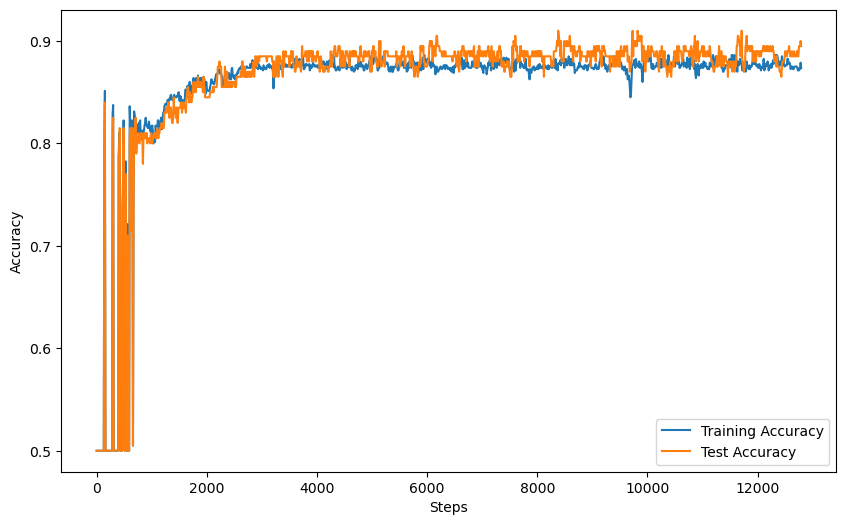

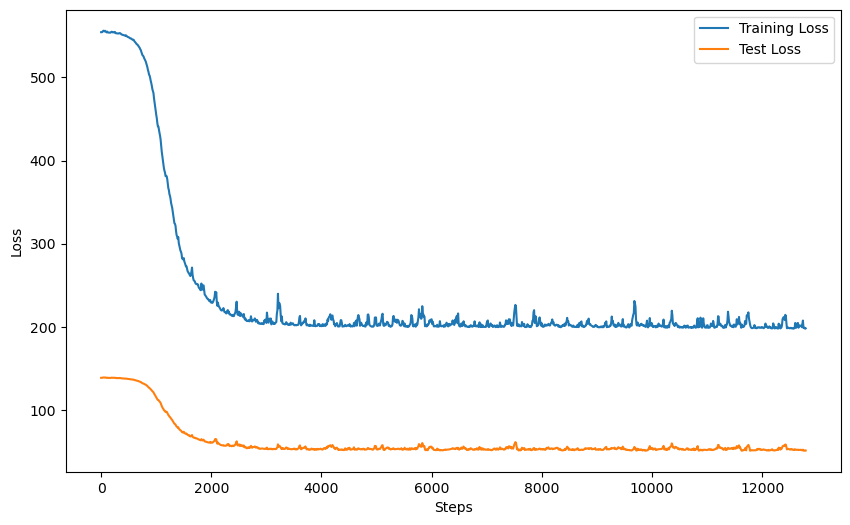

In [2]:
run_and_plot(numpy_mlp, 'moons_dataset.npz')

Training pytorch_train_mlp.py
Training script ran in 1.99 seconds
Step: 0, Train Loss: 0.6185787916183472, Test Loss: 0.5932861566543579, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 10, Train Loss: 0.39201149344444275, Test Loss: 0.3968075215816498, Train Accuracy: 0.8125, Test Accuracy: 0.81
Step: 20, Train Loss: 0.31749701499938965, Test Loss: 0.3336116075515747, Train Accuracy: 0.835, Test Accuracy: 0.83
Step: 30, Train Loss: 0.27578842639923096, Test Loss: 0.29105597734451294, Train Accuracy: 0.8625, Test Accuracy: 0.855
Step: 40, Train Loss: 0.2396681159734726, Test Loss: 0.25356999039649963, Train Accuracy: 0.8775, Test Accuracy: 0.885
Step: 50, Train Loss: 0.21517305076122284, Test Loss: 0.22686830163002014, Train Accuracy: 0.89625, Test Accuracy: 0.905
Step: 60, Train Loss: 0.19274958968162537, Test Loss: 0.2057604342699051, Train Accuracy: 0.915, Test Accuracy: 0.915
Step: 70, Train Loss: 0.1706613302230835, Test Loss: 0.18515846133232117, Train Accuracy: 0.92625, Test Accur

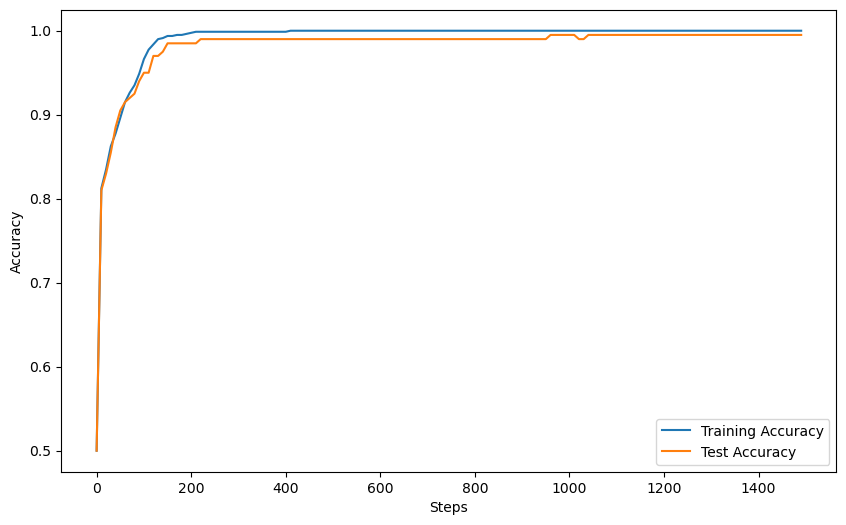

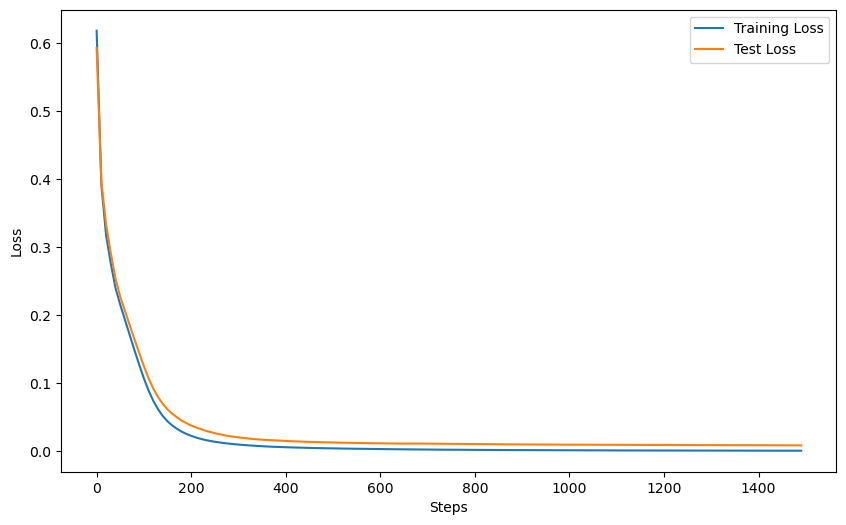

In [3]:
run_and_plot(pytorch_mlp, 'moons_dataset.npz')

Training /Users/claudiacumberbatch/Desktop/CS324_Deep_Learning/Assigment1/12110644_assignment1/Part_2/train_mlp_numpy.py
Training script ran in 0.62 seconds
Step: 0, Train Loss: 554.5224923157984, Test Loss: 138.62129583656454, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 10, Train Loss: 554.5904832606611, Test Loss: 138.63804340017515, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 20, Train Loss: 554.5792824489873, Test Loss: 138.63583514601328, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 30, Train Loss: 554.9202819604191, Test Loss: 138.721764705317, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 40, Train Loss: 555.5187877642124, Test Loss: 138.87136336848494, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 50, Train Loss: 555.8295322764689, Test Loss: 138.9495986683161, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 60, Train Loss: 556.7052837259959, Test Loss: 139.16835440364235, Train Accuracy: 0.5, Test Accuracy: 0.5
Step: 70, Train Loss: 555.5359194753627, Test Loss: 138.8763603

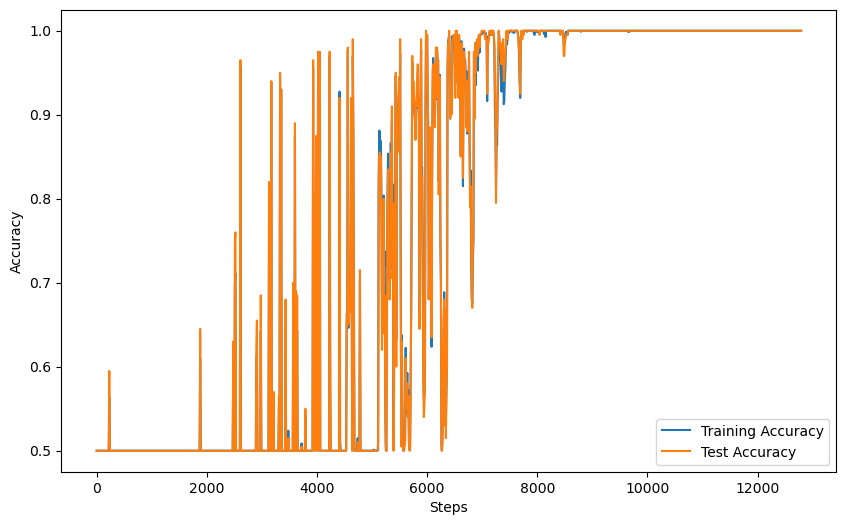

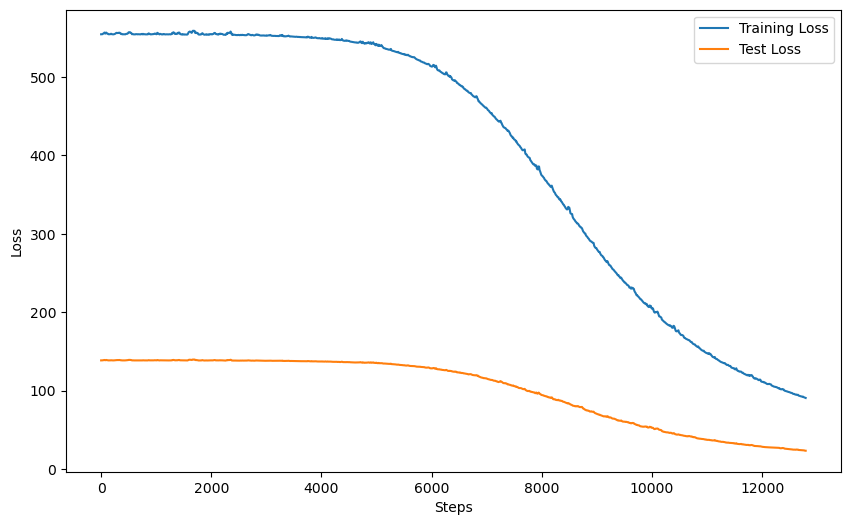

In [4]:
run_and_plot(numpy_mlp, 'circle_dataset.npz')

Training pytorch_train_mlp.py
Training script ran in 1.44 seconds
Step: 0, Train Loss: 0.7134872674942017, Test Loss: 0.7021166086196899, Train Accuracy: 0.51875, Test Accuracy: 0.48
Step: 10, Train Loss: 0.6395804286003113, Test Loss: 0.6262925863265991, Train Accuracy: 0.56875, Test Accuracy: 0.615
Step: 20, Train Loss: 0.555645227432251, Test Loss: 0.5397999286651611, Train Accuracy: 0.9275, Test Accuracy: 0.945
Step: 30, Train Loss: 0.4620610177516937, Test Loss: 0.4495106041431427, Train Accuracy: 0.97625, Test Accuracy: 0.97
Step: 40, Train Loss: 0.36614277958869934, Test Loss: 0.3531399071216583, Train Accuracy: 0.995, Test Accuracy: 0.995
Step: 50, Train Loss: 0.2754400372505188, Test Loss: 0.26533597707748413, Train Accuracy: 1.0, Test Accuracy: 1.0
Step: 60, Train Loss: 0.19981172680854797, Test Loss: 0.19217537343502045, Train Accuracy: 1.0, Test Accuracy: 1.0
Step: 70, Train Loss: 0.1437794715166092, Test Loss: 0.13846661150455475, Train Accuracy: 1.0, Test Accuracy: 1.0
St

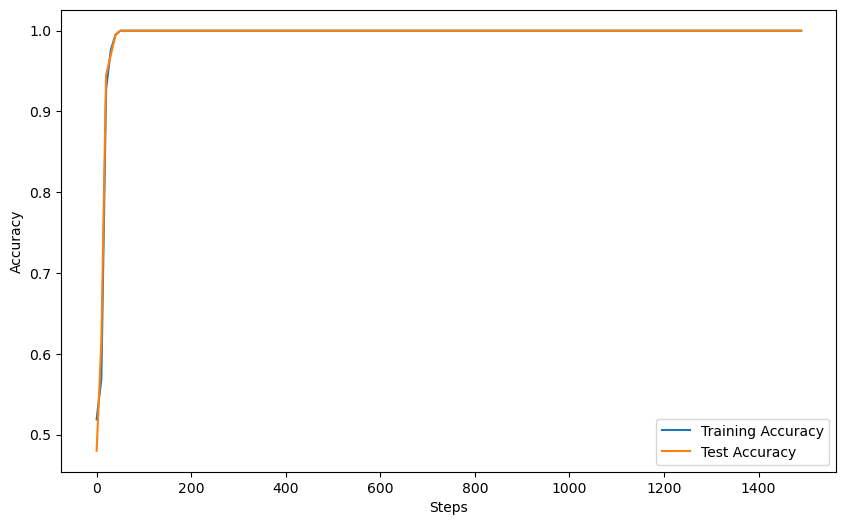

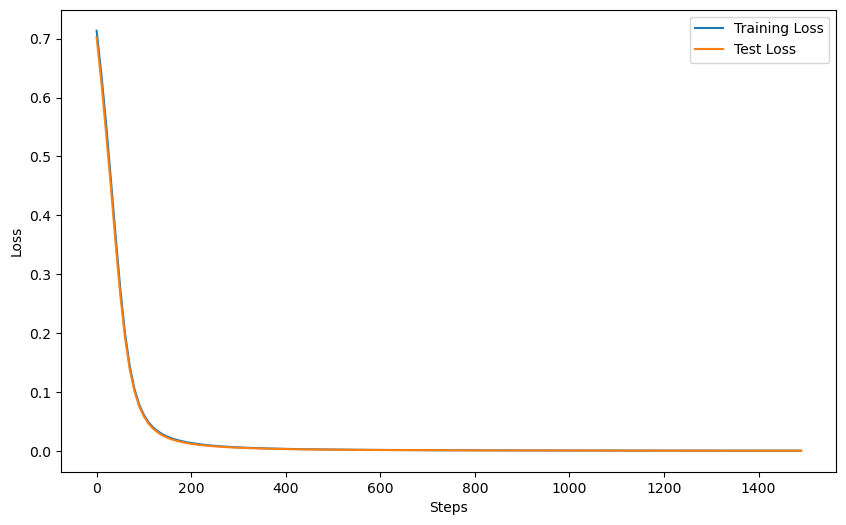

In [5]:
run_and_plot(pytorch_mlp, 'circle_dataset.npz')